<a href="https://colab.research.google.com/github/masoudshahrian/MachineLearning-Code/blob/master/Create_Avatar_From_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mediapipe torch torchvision opencv-python

In [ ]:
import cv2
import mediapipe as mp
import numpy as np
import torch
from torchvision import transforms
import matplotlib.pyplot as plt

Using cache found in /root/.cache/torch/hub/bryandlee_animegan2-pytorch_main


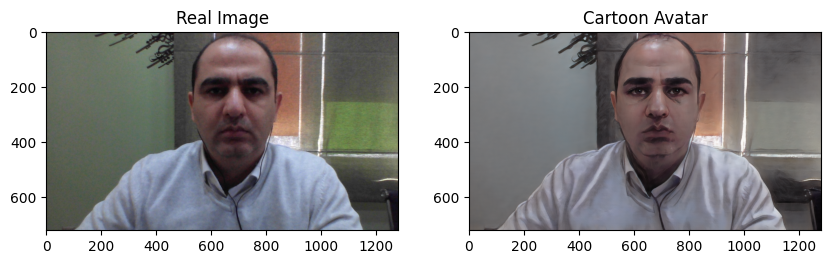

In [ ]:
# بارگیری مدل کارتونی‌سازی (CartoonGAN)
model = torch.hub.load('bryandlee/animegan2-pytorch', 'generator', pretrained='face_paint_512_v2')
model.eval()

# تنظیمات MediaPipe برای تشخیص صورت
mp_face_detection = mp.solutions.face_detection
face_detection = mp_face_detection.FaceDetection(min_detection_confidence=0.5)

def cartoonize_face(image):
    # پیش‌پردازش تصویر
    preprocess = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])

    input_tensor = preprocess(image).unsqueeze(0)

    # تولید تصویر کارتونی
    with torch.no_grad():
        output = model(input_tensor)

    # پس‌پردازش خروجی
    output = output.squeeze().permute(1, 2, 0).numpy()
    output = (output * 0.5 + 0.5) * 255
    return output.astype(np.uint8)

def process_image(image_path):
    # خواندن تصویر ورودی
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # تشخیص صورت
    results = face_detection.process(image)

    if results.detections:
        # پردازش صورت تشخیص داده شده
        cartoon = cartoonize_face(image)
        return cartoon
    else:
        raise ValueError("هیچ صورتی در تصویر تشخیص داده نشد!")

# مثال اجرا
input_image_path = "/content/masoud_image.jpg"  # آدرس تصویر خود را وارد کنید
output_image = process_image(input_image_path)

plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(plt.imread(input_image_path)), plt.title('Real Image')
plt.subplot(122), plt.imshow(output_image), plt.title('Cartoon Avatar')
plt.show()

Using cache found in /root/.cache/torch/hub/bryandlee_animegan2-pytorch_main


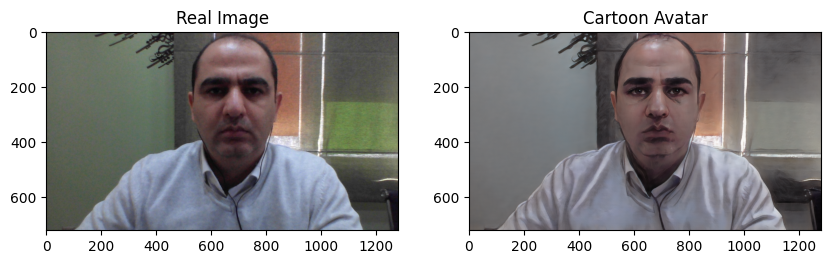

In [ ]:
# import torch
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# from torchvision import transforms
# import mediapipe as mp

# بارگیری مدل کارتونی‌سازی (CartoonGAN)
model = torch.hub.load('bryandlee/animegan2-pytorch', 'generator', pretrained='face_paint_512_v2')
model.eval()

# تنظیمات MediaPipe برای تشخیص صورت
mp_face_detection = mp.solutions.face_detection
face_detection = mp_face_detection.FaceDetection(min_detection_confidence=0.5)

def cartoonize_face(image):
    # پیش‌پردازش تصویر
    preprocess = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])

    input_tensor = preprocess(image).unsqueeze(0)

    # تولید تصویر کارتونی
    with torch.no_grad():
        output = model(input_tensor)

    # پس‌پردازش خروجی
    output = output.squeeze().permute(1, 2, 0).numpy()
    output = (output * 0.5 + 0.5) * 255
    return output.astype(np.uint8)

def process_image(image_path, output_path):
    # خواندن تصویر ورودی
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # تشخیص صورت
    results = face_detection.process(image)

    if results.detections:
        # پردازش صورت تشخیص داده شده
        cartoon = cartoonize_face(image)

        # ذخیره تصویر کارتونی
        cv2.imwrite(output_path, cv2.cvtColor(cartoon, cv2.COLOR_RGB2BGR))

        return cartoon
    else:
        raise ValueError("هیچ صورتی در تصویر تشخیص داده نشد!")

# مثال اجرا
input_image_path = "/content/masoud_image.jpg"  # آدرس تصویر خود را وارد کنید
output_image_path = "/content/masoud_avatar.jpg"  # آدرس ذخیره تصویر کارتونی
output_image = process_image(input_image_path, output_image_path)

# نمایش تصاویر
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(plt.imread(input_image_path)), plt.title('Real Image')
plt.subplot(122), plt.imshow(output_image), plt.title('Cartoon Avatar')
plt.show()